In [1]:
import joypy
import pandas as pd
import geopandas as gpd
from matplotlib import cm
import xarray as xr

In [2]:
gpd.options.io_engine = "pyogrio"

In [3]:
# df = gpd.read_file('basin_9_02-22.gpkg')
df = gpd.read_file('basin_data.gpkg')

C:\Users\k000851\AppData\Local\miniforge3\envs\SatvisTest\Lib\site-packages\pyogrio\geopandas.py:49: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  res = pd.to_datetime(ser, **datetime_kwargs)


In [6]:
# TODO Maybe not necessary to add year column
df['year'] = df['time'].dt.year
df

,dim_0,time,BASIN_NR,basin_name,area,bloom_area,cloud_area,fca,geometry,year
0,0,2002-01-01,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
1,0,2002-01-02,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
2,0,2002-01-03,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
3,0,2002-01-04,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
4,0,2002-01-05,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
...,...,...,...,...,...,...,...,...,...,...
8030,0,2023-12-27,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
8031,0,2023-12-28,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
8032,0,2023-12-29,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
8033,0,2023-12-30,9,Östra Gotlandshavet,64599679622,NaN,NaN,NaN,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023


In [7]:
df['fca'] = df['fca'].fillna(0)

In [8]:
df['time']

0      2002-01-01
1      2002-01-02
2      2002-01-03
3      2002-01-04
4      2002-01-05
          ...    
8030   2023-12-27
8031   2023-12-28
8032   2023-12-29
8033   2023-12-30
8034   2023-12-31
Name: time, Length: 8035, dtype: datetime64[ms]

In [18]:
# TODO Refine start/end date values to better match data (filter.min()/.max())
start_date = pd.to_datetime('2002-05-01')
end_date = pd.to_datetime('2002-09-30')
selected_years = range(2002, 2024)
# selected years = [2002, 2003]

In [20]:
# TODO Add to x_range of plot
(end_date- start_date).days

152

In [11]:
mask = (df['time'].dt.year.isin(selected_years)) & (df['time'].dt.month >= start_date.month) & (df['time'].dt.month <= end_date.month) & (df['time'].dt.day >= start_date.day) & (df['time'].dt.day <= end_date.day)

In [12]:
gdf_season = df.loc[mask]
gdf_season

,dim_0,time,BASIN_NR,basin_name,area,bloom_area,cloud_area,fca,geometry,year
120,0,2002-05-01,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
121,0,2002-05-02,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
122,0,2002-05-03,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
123,0,2002-05-04,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
124,0,2002-05-05,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2002
...,...,...,...,...,...,...,...,...,...,...
7938,0,2023-09-26,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
7939,0,2023-09-27,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
7940,0,2023-09-28,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023
7941,0,2023-09-29,9,Östra Gotlandshavet,64599679622,NaN,NaN,0.0,"POLYGON ((706381.13080 6322005.71510, 706379.9...",2023


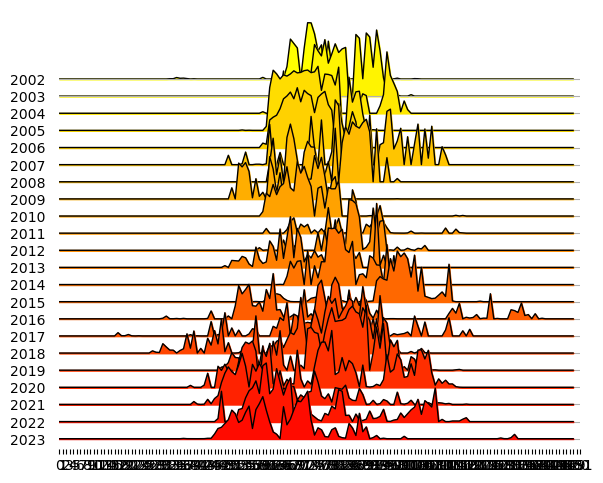

In [21]:
%matplotlib inline

x_range = list(range(152))
# labels=[y if y%10==0 else None for y in list(df.time.unique())]
fig, axes = joypy.joyplot(gdf_season, by="year", column="fca", labels=None, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title=None, kind='values', x_range=x_range,
                          colormap=cm.autumn_r)
axes[-1].set_xticks(x_range);

In [ ]:
# Bell curve or similar of the bloom periods per year